<a href="https://colab.research.google.com/github/MAFaisal7/AS/blob/master/covid_indonesia_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import nltk
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid19_articles.csv to covid19_articles.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['covid19_articles.csv']))


In [ ]:
data

Unnamed: 0  ... topic_area
0               0  ...    general
1               1  ...    science
2               2  ...    general
3               3  ...    general
4               4  ...    general
...           ...  ...        ...
52336       52336  ...    finance
52337       52337  ...    finance
52338       52338  ...   business
52339       52339  ...    general
52340       52340  ...   business

[52341 rows x 8 columns]

In [ ]:
data.shape
data.dtypes
data.isnull().sum()

data = data.dropna(subset=['content'])

In [ ]:
data

Unnamed: 0  ... topic_area
0               0  ...    general
1               1  ...    science
2               2  ...    general
3               3  ...    general
4               4  ...    general
...           ...  ...        ...
52336       52336  ...    finance
52337       52337  ...    finance
52338       52338  ...   business
52339       52339  ...    general
52340       52340  ...   business

[52341 rows x 8 columns]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


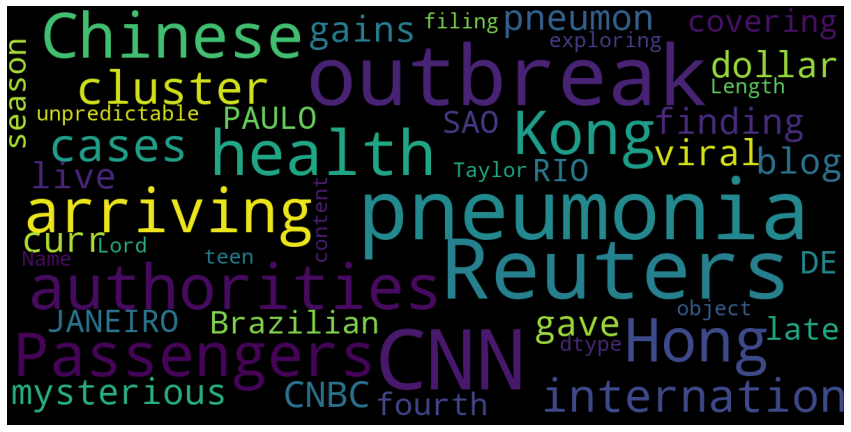

In [ ]:
show_wordcloud(data['content'])
trace = go.Bar(
    orientation = 'h',
    marker=dict(
        colorscale = 'Blues',
        reversescale = True
    ),
)

In [ ]:
import seaborn as sns

from IPython.display import HTML
cat_hist = data.groupby('topic_area',as_index=False).count()
HTML(pd.DataFrame(cat_hist['topic_area']).to_html())

In [ ]:
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    return re.sub("["+string.punctuation+"]", " ", x)

stops = set(stopwords.words("english"))
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['content'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [ ]:
k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print()

cluster of words 0:
 said
 market
 bank
 china
 billion
 year
 economy
 markets
 economic
 quarter

cluster of words 1:
 said
 people
 cases
 coronavirus
 health
 virus
 china
 trump
 new
 uk

cluster of words 2:
 oil
 opec
 crude
 prices
 rsquo
 saudi
 nbsp
 bpd
 demand
 russia

cluster of words 3:
 said
 coronavirus
 people
 company
 new
 time
 covid
 19
 home
 health

cluster of words 4:
 league
 season
 club
 players
 premier
 liverpool
 transfer
 football
 chelsea
 united



In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
from collections import defaultdict

In [ ]:
import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in data.content:
    pol_score = sia.polarity_scores(line)
    pol_score['content'] = line
    results.append(pol_score)

results

[{'compound': -0.9973,
  'content': '(CNN) Chinese health authorities have not been able to identify a mysterious strain of pneumonia that has infected dozens of people and put the rest of Asia on alert -- although they have ruled out a return of the deadly severe acute respiratory syndrome (SARS) virus. A total of 59 cases of unknown viral pneumonia have been reported in the city of Wuhan, central China, with seven patients in critical condition, the Wuhan Municipal Health Commission said in a statement on Sunday. All patients are being treated in quarantine, and no deaths have been reported. According to the World Health Organization (WHO), symptoms of the pneumonia are mainly fever, with a number of patients having difficulty breathing, and chest radiographs showing invasive lesions of both lungs. The outbreak came to light in late December and prompted fears in China of a possible resurgence of SARS, an acute viral respiratory illness first reported in the country in 2002 that caus

In [ ]:
df1 = pd.DataFrame.from_records(results)
df1

neg  ...                                            content
0      0.095  ...  (CNN) Chinese health authorities have not been...
1      0.087  ...  Passengers arriving at Hong Kong's internation...
2      0.087  ...  A cluster of more than 50 pneumonia cases in t...
3      0.060  ...  (CNN) A mysterious pneumonia outbreak that has...
4      0.066  ...  The finding that the outbreak of viral pneumon...
...      ...  ...                                                ...
52336  0.119  ...  The dollar gave up some gains against the curr...
52337  0.090  ...  This is CNBC's live blog covering all the late...
52338  0.070  ...  SAO PAULO/RIO DE JANEIRO (Reuters) - Brazilian...
52339  0.102  ...    The fourth season of the unpredictable teen ...
52340  0.012  ...  (Reuters) - Lord & Taylor is exploring filing ...

[52341 rows x 5 columns]

In [ ]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1

neg    neu  ...                                            content  label
0      0.095  0.886  ...  (CNN) Chinese health authorities have not been...     -1
1      0.087  0.886  ...  Passengers arriving at Hong Kong's internation...     -1
2      0.087  0.856  ...  A cluster of more than 50 pneumonia cases in t...     -1
3      0.060  0.905  ...  (CNN) A mysterious pneumonia outbreak that has...     -1
4      0.066  0.898  ...  The finding that the outbreak of viral pneumon...     -1
...      ...    ...  ...                                                ...    ...
52336  0.119  0.738  ...  The dollar gave up some gains against the curr...      1
52337  0.090  0.840  ...  This is CNBC's live blog covering all the late...     -1
52338  0.070  0.875  ...  SAO PAULO/RIO DE JANEIRO (Reuters) - Brazilian...     -1
52339  0.102  0.787  ...    The fourth season of the unpredictable teen ...      1
52340  0.012  0.913  ...  (Reuters) - Lord & Taylor is exploring filing ...      1

[52341 rows x 6 columns]

In [ ]:
from google.colab import files

df1.to_csv('covidsentiout.csv')
files.download('covidsentiout.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covidsentiout-1.csv to covidsentiout-1.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['covidsentiout-1.csv']))

In [ ]:
df1

Unnamed: 0  ...  label
0               0  ...     -1
1               1  ...     -1
2               2  ...     -1
3               3  ...     -1
4               4  ...     -1
...           ...  ...    ...
11993       11993  ...      1
11994       11994  ...     -1
11995       11995  ...     -1
11996       11996  ...     -1
11997       11997  ...      1

[11998 rows x 7 columns]

In [ ]:
print("Positive headlines:\n")
print (list(df1[df1['label'] == 1].content)[:5])

print("\nNegative headlines:\n")
print (list(df1[df1['label'] == -1].content)[:5])

Positive headlines:

['A seafoofd market in Wuhan, China has been considered the likely source of an outbreak of a novel virus but it may have first infected people elsewhere. By Jon CohenJan. 11, 2020 , 3:00 PM Scientists worried about China’s lack of transparency about a month-old outbreak of pneumonia in the city of Wuhan breathed a sigh of relief today, after a consortium of researchers published a draft genome of the newly discovered coronavirus suspected of causing the outbreak. “Potentially really important moment in global public health-must be celebrated, everyone involved in Wuhan, in China & beyond acknowledged, thanked & get all the credit,” Jeremy Farrar, head of the Wellcome Trust in London,\xa0wrote in a tweet. “Sharing of data good for public health, great for those who did the work. Just needs those incentives & trust.” Also this morning, Wuhan health authorities reported the first death from the new disease. The patient was a 61-year-old man who frequently visited the

In [ ]:
print(df1.label.value_counts())

print(df1.label.value_counts(normalize=True) * 100)

 1    29025
-1    21415
 0     1901
Name: label, dtype: int64
 1    55.453660
-1    40.914388
 0     3.631952
Name: label, dtype: float64


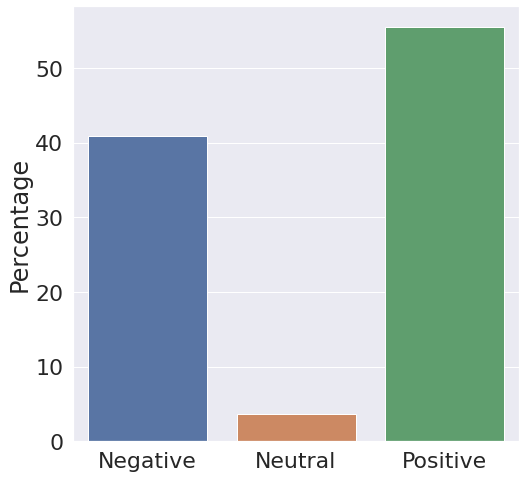

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [ ]:
def process_text(conent):
    tokens = []
    for line in df1.content:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stopwords]
        tokens.extend(toks)
    
    return tokens

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pos_lines = list(df1[df1.label == 1].content)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common (1000)

[('s', 88658),
 ('said', 53551),
 ('coronavirus', 52007),
 ('china', 30557),
 ('will', 29737),
 ('people', 24887),
 ('outbreak', 23596),
 ('virus', 23440),
 ('health', 21620),
 ('new', 20810),
 ('1', 20259),
 ('year', 20194),
 ('cases', 17335),
 ('t', 15209),
 ('one', 13685),
 ('2', 13603),
 ('company', 12672),
 ('world', 12276),
 ('u', 11890),
 ('first', 11731),
 ('3', 11520),
 ('last', 11502),
 ('market', 11116),
 ('week', 11032),
 ('now', 10991),
 ('million', 10958),
 ('global', 10950),
 ('spread', 10774),
 ('time', 10601),
 ('two', 10356),
 ('back', 10350),
 ('us', 10083),
 ('government', 9732),
 ('000', 9367),
 ('chinese', 9262),
 ('5', 9172),
 ('may', 9165),
 ('0', 9098),
 ('19', 8932),
 ('public', 8617),
 ('oil', 8517),
 ('travel', 8363),
 ('4', 8331),
 ('2020', 8203),
 ('day', 8153),
 ('2019', 8128),
 ('confirmed', 8077),
 ('country', 8002),
 ('wuhan', 7823),
 ('told', 7794),
 ('march', 7741),
 ('including', 7697),
 ('disease', 7690),
 ('according', 7685),
 ('number', 7616),
 (

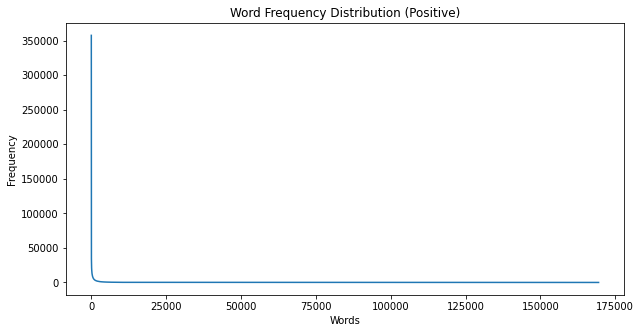

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [ ]:
neg_lines = list(df1[df1.label == -1].content)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('s', 357711),
 ('said', 216702),
 ('coronavirus', 171486),
 ('will', 145693),
 ('people', 106551),
 ('new', 81797),
 ('t', 80020),
 ('health', 72259),
 ('one', 64245),
 ('virus', 60876),
 ('19', 58828),
 ('year', 57940),
 ('time', 55299),
 ('back', 54966),
 ('now', 54359),
 ('1', 54300),
 ('covid', 54188),
 ('government', 52885),
 ('outbreak', 52131),
 ('china', 50777)]

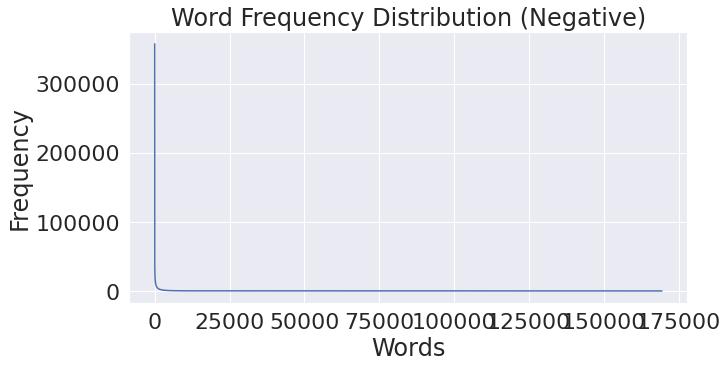

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

In [ ]:
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [ ]:
text = " ".join(articles for articles in df1.content)
print ("There are {} words in the combination of all articles.".format(len(text)))

There are 49732974 words in the combination of all articles.


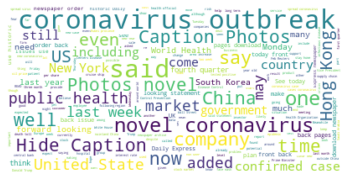

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
pos_text = " ".join(words for words in  pos_tokens)

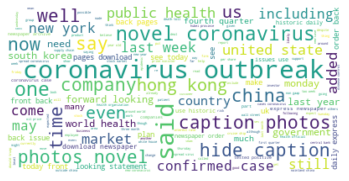

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
df1 = df1.dropna(subset=['content'])
all_text=df1['content']
train_text=df1['content']
y=df1['label']

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Using the N-Gram Tf-idf Vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=1200)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=1200)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

In [ ]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

          -1       0.82      0.69      0.75      2128
           0       0.03      0.67      0.05         6
           1       0.66      0.75      0.70      1466

    accuracy                           0.71      3600
   macro avg       0.50      0.70      0.50      3600
weighted avg       0.76      0.71      0.73      3600



In [ ]:
# XGBoost
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

          -1       0.82      0.73      0.78      1992
           0       0.01      0.33      0.01         3
           1       0.73      0.77      0.75      1605

    accuracy                           0.75      3600
   macro avg       0.52      0.61      0.51      3600
weighted avg       0.78      0.75      0.76      3600

